In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

%matplotlib inline

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [5]:
test=pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv')
test.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807


In [6]:
test_1=test.copy()

In [7]:
sample=pd.read_csv('/kaggle/input/playground-series-s3e20/sample_submission.csv')

<Axes: >

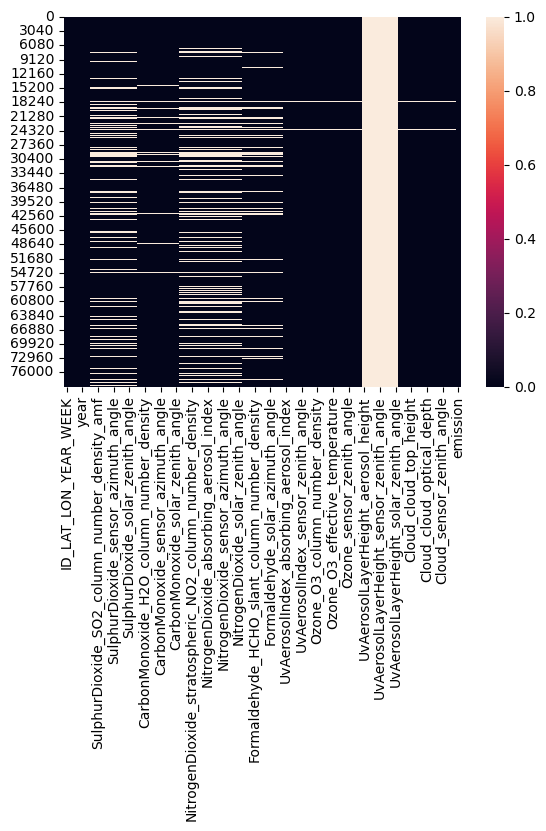

In [8]:
sns.heatmap(train.isnull())

<div class="alert alert-block alert-info"> 📌 From the above heatmap we can conclude that are there many missing values and these cannot be dropped.</div>

In [9]:
print(train.isna().sum())

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_sensor_azimuth_angle    484
Cloud_sensor_zenith_angle     484
Cloud_solar_azimuth_angle     484
Cloud_solar_zenith_angle      484
emission                        0
Length: 76, dtype: int64


In [10]:
print(train.groupby(['latitude', 'longitude']).size().sort_values())
print()
print(test.groupby(['latitude', 'longitude']).size().sort_values())
print()

latitude  longitude
-3.299    30.301       159
-1.444    30.856       159
-1.450    29.350       159
-1.482    30.618       159
-1.486    29.614       159
                      ... 
-2.293    29.507       159
-2.300    29.200       159
-2.301    29.899       159
-2.257    30.243       159
-0.510    29.290       159
Length: 497, dtype: int64

latitude  longitude
-3.299    30.301       49
-1.444    30.856       49
-1.450    29.350       49
-1.482    30.618       49
-1.486    29.614       49
                       ..
-2.293    29.507       49
-2.300    29.200       49
-2.301    29.899       49
-2.257    30.243       49
-0.510    29.290       49
Length: 497, dtype: int64



In [11]:
train.groupby(['latitude', 'longitude']).emission.mean().sort_values()

latitude  longitude
-1.682    29.218          0.000000
-2.859    29.041          0.000000
-1.833    28.467          0.000000
-2.841    29.159          0.000000
-1.974    28.526          0.000000
                          ...     
-1.342    31.358        409.606870
-0.956    30.744        455.398039
-1.346    31.254        475.289138
-2.079    29.321       1221.886518
-2.378    29.222       2233.431628
Name: emission, Length: 497, dtype: float64

In [12]:
# https://www.kaggle.com/code/inversion/getting-started-eda

# Combine train and test for easy visualisation
train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
test_coords = test.drop_duplicates(subset = ['latitude', 'longitude'])
train_coords['set_type'], test_coords['set_type'] = 'train', 'test'

all_data = pd.concat([train_coords, test_coords], ignore_index = True)

# Create point geometries
geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo = gpd.GeoDataFrame(
    all_data[["latitude", "longitude", "set_type"]], geometry=geometry
)

geo.head()

,latitude,longitude,set_type,geometry
0,-0.510,29.290,train,POINT (29.29000 -0.51000)
1,-0.528,29.472,train,POINT (29.47200 -0.52800)
2,-0.547,29.653,train,POINT (29.65300 -0.54700)
3,-0.569,30.031,train,POINT (30.03100 -0.56900)
4,-0.598,29.102,train,POINT (29.10200 -0.59800)


In [13]:
# https://www.kaggle.com/code/inversion/getting-started-eda

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type set
    if geo.set_type[i] == "train":
        type_color = "green"
    elif geo.set_type[i] == "test":
        type_color = "orange"

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            popup= 
            "Set: " + str(geo.set_type[i]) + "<br>"
            "Coordinates: " + str([round(x, 2) for x in geo_df_list[i]]),
            color =  type_color),
        )
    i = i + 1
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

<Axes: >

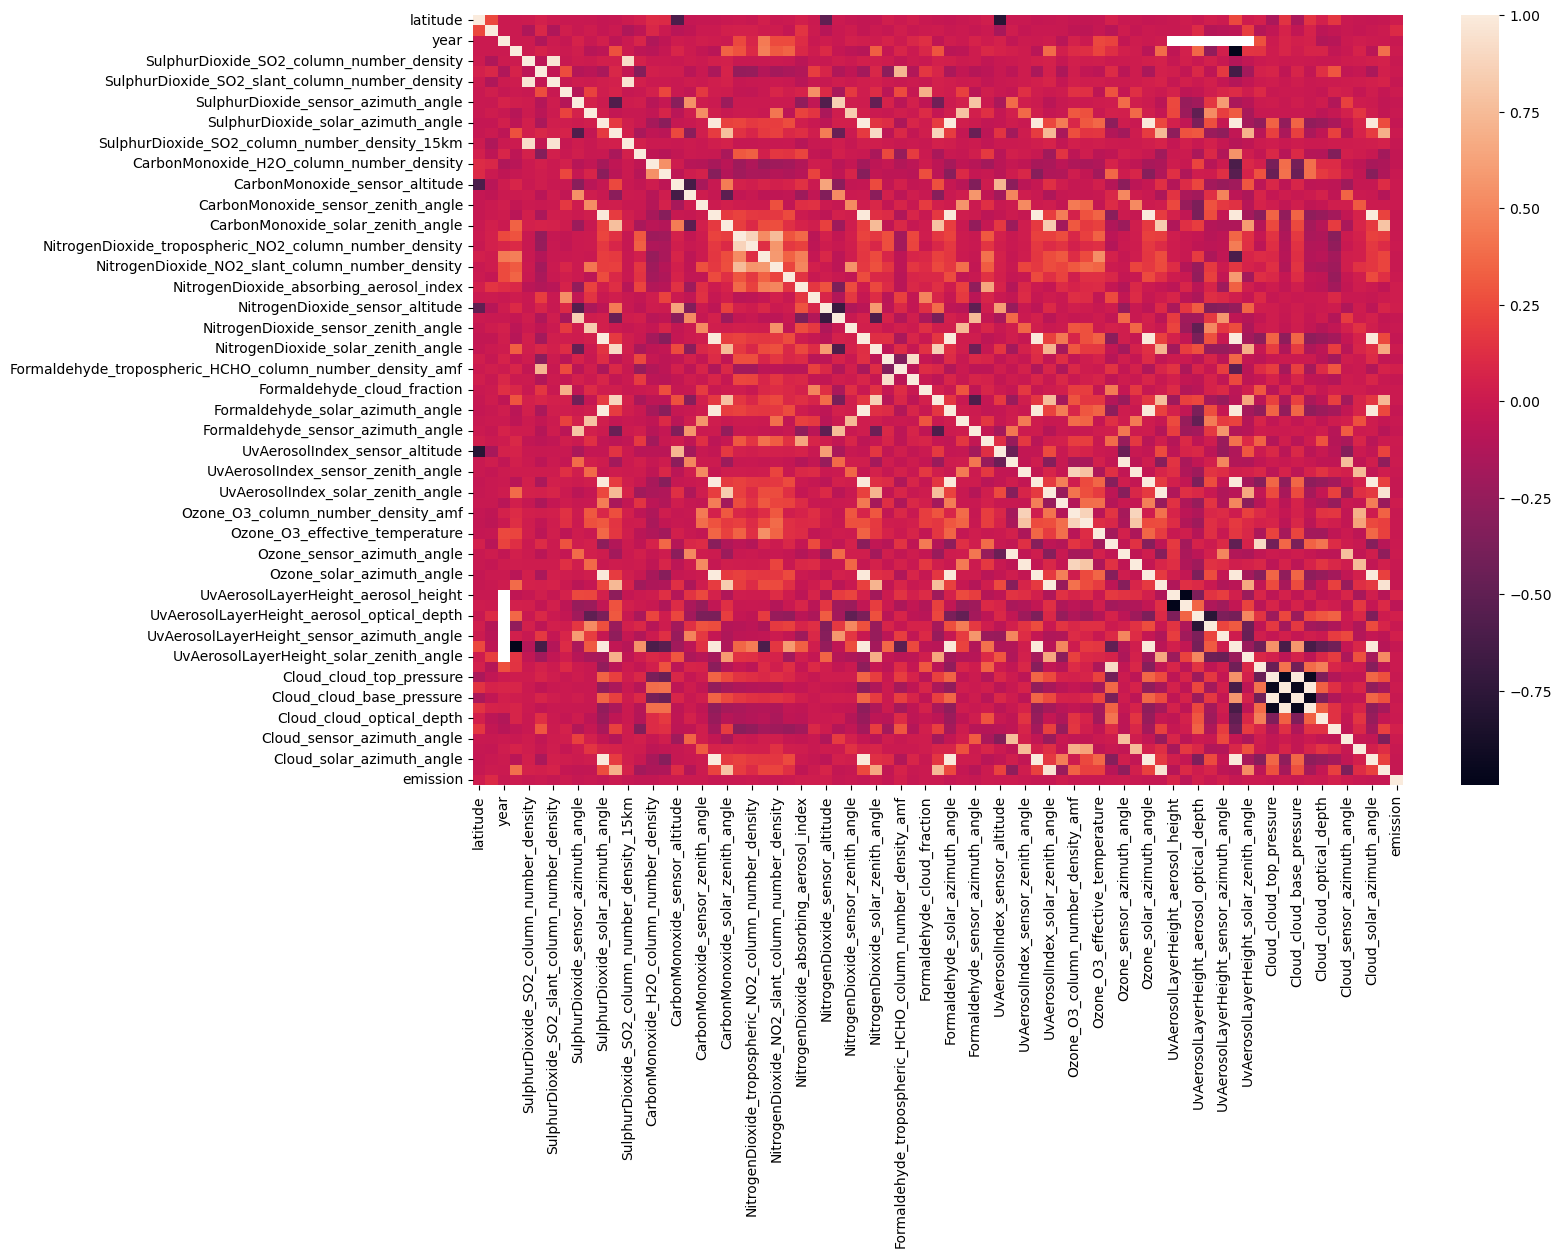

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr())

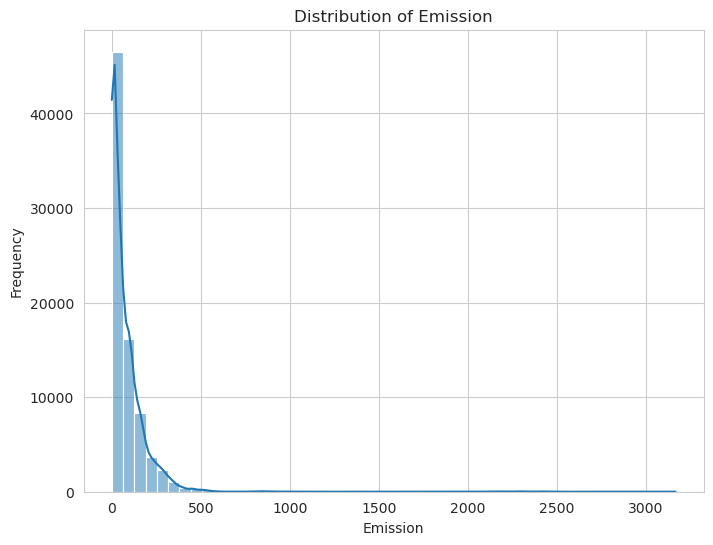

In [15]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(train['emission'], bins=50, kde=True)
plt.title('Distribution of Emission')
plt.xlabel('Emission')
plt.ylabel('Frequency')
plt.show()

In [16]:
train = train[["latitude", "longitude", "year", "week_no", "emission"]]
test = test[["latitude", "longitude", "year", "week_no"]]

In [17]:
df = pd.concat([train.drop('emission', axis = 1), test], axis = 0)
df.shape
X = df.iloc[:train.shape[0], :]
y = train['emission']
X_test = df.iloc[train.shape[0]:,:]
X.shape, y.shape, X_test.shape

((79023, 4), (79023,), (24353, 4))

In [18]:
X_train = df[df.year<2021]
X_val = df[df.year>=2021]
y_train = y[:X_train.shape[0]]
y_val = y[X_train.shape[0]:]
from sklearn.model_selection import train_test_split
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((52682, 4), (50694, 4), (52682,), (26341,))

In [19]:
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingRegressor,RandomForestRegressor, AdaBoostRegressor)
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold, TimeSeriesSplit
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.calibration import CalibratedClassifierCV
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

In [20]:
models = {
    "DT":DecisionTreeRegressor(),
    "XGBoost" : XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose = False),
    "LightGBM": LGBMRegressor(),
    "RFC":RandomForestRegressor(),
    "gbc":GradientBoostingRegressor(),
    "abc":AdaBoostRegressor(),
    "KNN": KNeighborsRegressor(),
}

In [21]:
lgbm_param = {
        'metric': 'rmse', 
        'random_state': 48,
        'n_estimators': 20000,
    }

cat_params={
    'grow_policy': 'Depthwise',
    'iterations': 8000,
    'use_best_model': True,
    'eval_metric': 'RMSE',
    'od_type': 'iter',
    'od_wait': 50,
    'random_state': 42,
    'logging_level': 'Silent',
}

xgbooster_params = {   
    "random_state": 42,
    "colsample_bytree": 0.4,
    "gamma": 0,                 
    "max_depth": 3,
    "min_child_weight": 1.5,
    "n_estimators": 10000,                                                                    
    "reg_alpha": 0.75,
    "reg_lambda": 0.45,
    "subsample": 0.6,
    "seed": 42
}

random_forest_params = {
    "random_state": 42,
    "verbose": 0,
    "n_estimators": 250, 
    "criterion": 'rmse', 
    "max_depth": 30
}


In [22]:
#https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense

score_list = []
kf = LeaveOneGroupOut()
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, groups=train.year)):
    X_tr = train.iloc[idx_tr][['longitude', 'latitude', 'week_no']]
    y_tr = train.iloc[idx_tr]['emission']
    X_va = train.iloc[idx_va][['longitude', 'latitude', 'week_no']]
    y_va = train.iloc[idx_va]['emission']

    model = CatBoostRegressor() # or DecisionTreeRegressor()
    model.fit(X_tr, y_tr)
    y_va_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_va_pred, squared=False)
    print(f"Fold {fold} year {train.iloc[idx_va].year.iloc[0]}: rmse = {rmse:.2f}")
    score_list.append(rmse)

rmse = sum(score_list) / len(score_list)
print(f"Overall RMSE: {rmse:.2f}")

Learning rate set to 0.076595
0:	learn: 136.6879797	total: 60.4ms	remaining: 1m
1:	learn: 134.1430360	total: 65.5ms	remaining: 32.7s
2:	learn: 129.3250345	total: 70.1ms	remaining: 23.3s
3:	learn: 125.1392980	total: 74.7ms	remaining: 18.6s
4:	learn: 121.5502164	total: 79.5ms	remaining: 15.8s
5:	learn: 120.5308348	total: 83.8ms	remaining: 13.9s
6:	learn: 117.3613345	total: 88.2ms	remaining: 12.5s
7:	learn: 114.4424425	total: 92.6ms	remaining: 11.5s
8:	learn: 111.9413857	total: 97.1ms	remaining: 10.7s
9:	learn: 111.1516727	total: 102ms	remaining: 10.1s
10:	learn: 110.4368835	total: 106ms	remaining: 9.51s
11:	learn: 108.0935110	total: 110ms	remaining: 9.09s
12:	learn: 107.2607928	total: 115ms	remaining: 8.72s
13:	learn: 106.6748411	total: 119ms	remaining: 8.38s
14:	learn: 105.1779404	total: 123ms	remaining: 8.11s
15:	learn: 103.1381172	total: 129ms	remaining: 7.91s
16:	learn: 101.6227225	total: 133ms	remaining: 7.7s
17:	learn: 99.6701297	total: 138ms	remaining: 7.51s
18:	learn: 98.8659840	

In [23]:
#https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense

score_list = []
kf = LeaveOneGroupOut()
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, groups=train.year)):
    X_tr = train.iloc[idx_tr][['longitude', 'latitude', 'week_no']]
    y_tr = train.iloc[idx_tr]['emission']
    X_va = train.iloc[idx_va][['longitude', 'latitude', 'week_no']]
    y_va = train.iloc[idx_va]['emission']

    model = RandomForestRegressor() # or DecisionTreeRegressor()
    model.fit(X_tr, y_tr)
    y_va_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_va_pred, squared=False)
    print(f"Fold {fold} year {train.iloc[idx_va].year.iloc[0]}: rmse = {rmse:.2f}")
    score_list.append(rmse)

rmse = sum(score_list) / len(score_list)
print(f"Overall RMSE: {rmse:.2f}")

Fold 0 year 2019: rmse = 20.33
Fold 1 year 2020: rmse = 27.33
Fold 2 year 2021: rmse = 18.73
Overall RMSE: 22.13


In [24]:
#https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense

score_list = []
kf = LeaveOneGroupOut()
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, groups=train.year)):
    X_tr = train.iloc[idx_tr][['longitude', 'latitude', 'week_no']]
    y_tr = train.iloc[idx_tr]['emission']
    X_va = train.iloc[idx_va][['longitude', 'latitude', 'week_no']]
    y_va = train.iloc[idx_va]['emission']

    model = DecisionTreeRegressor() 
    model.fit(X_tr, y_tr)
    y_va_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_va_pred, squared=False)
    print(f"Fold {fold} year {train.iloc[idx_va].year.iloc[0]}: rmse = {rmse:.2f}")
    score_list.append(rmse)

rmse = sum(score_list) / len(score_list)
print(f"Overall RMSE: {rmse:.2f}")

Fold 0 year 2019: rmse = 20.29
Fold 1 year 2020: rmse = 27.14
Fold 2 year 2021: rmse = 19.77
Overall RMSE: 22.40


In [25]:
#https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense

score_list = []
kf = LeaveOneGroupOut()
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, groups=train.year)):
    X_tr = train.iloc[idx_tr][['longitude', 'latitude', 'week_no']]
    y_tr = train.iloc[idx_tr]['emission']
    X_va = train.iloc[idx_va][['longitude', 'latitude', 'week_no']]
    y_va = train.iloc[idx_va]['emission']

    model = LGBMRegressor() 
    model.fit(X_tr, y_tr)
    y_va_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_va_pred, squared=False)
    print(f"Fold {fold} year {train.iloc[idx_va].year.iloc[0]}: rmse = {rmse:.2f}")
    score_list.append(rmse)

rmse = sum(score_list) / len(score_list)
print(f"Overall RMSE: {rmse:.2f}")

Fold 0 year 2019: rmse = 33.11
Fold 1 year 2020: rmse = 31.17
Fold 2 year 2021: rmse = 27.61
Overall RMSE: 30.63


In [26]:
#https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense
score_list = []
kf = LeaveOneGroupOut()
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, groups=train.year)):
    X_tr = train.iloc[idx_tr][['longitude', 'latitude', 'week_no']]
    y_tr = train.iloc[idx_tr]['emission']
    X_va = train.iloc[idx_va][['longitude', 'latitude', 'week_no']]
    y_va = train.iloc[idx_va]['emission']

    model = XGBRegressor() # or DecisionTreeRegressor()
    model.fit(X_tr, y_tr)
    y_va_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_va_pred, squared=False)
    print(f"Fold {fold} year {train.iloc[idx_va].year.iloc[0]}: rmse = {rmse:.2f}")
    score_list.append(rmse)

rmse = sum(score_list) / len(score_list)
print(f"Overall RMSE: {rmse:.2f}")

Fold 0 year 2019: rmse = 23.04
Fold 1 year 2020: rmse = 27.36
Fold 2 year 2021: rmse = 21.95
Overall RMSE: 24.12


<div class="alert alert-block alert-info"> 📌 Out of all the models, Random Forest Regressor gives us the best accuracy.</div>

In [27]:
model = RandomForestRegressor() 
model.fit(train[['longitude', 'latitude', 'week_no']], train.emission)
y_pred = model.predict(test[['longitude', 'latitude', 'week_no']])

In [28]:
#https://www.kaggle.com/code/iqbalsyahakbar/ps3e20-time-series-for-beginners

test_1.drop(list(test_1.drop('ID_LAT_LON_YEAR_WEEK', axis = 1)), axis = 1, inplace = True)

test_1['emission'] = y_pred
test_1.to_csv('submission.csv', index = False)

In [29]:
test_1

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.628288
1,ID_-0.510_29.290_2022_01,4.024909
2,ID_-0.510_29.290_2022_02,4.118422
3,ID_-0.510_29.290_2022_03,4.181815
4,ID_-0.510_29.290_2022_04,4.233915
...,...,...
24348,ID_-3.299_30.301_2022_44,28.671730
24349,ID_-3.299_30.301_2022_45,29.155252
24350,ID_-3.299_30.301_2022_46,29.209001
24351,ID_-3.299_30.301_2022_47,29.748824
